### Foundations of Data Science 7COM1073                                                           
### University of Hertfordshire 
### Coursework–Data Analysis
### Student ID 19066137

In [1]:
# importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
from sympy import Limit , Symbol, S
x= Symbol('x')
l=Limit(1/x, x , S.Infinity)
l.doit()

0

## Task 1

In [2]:
train_data= pd.read_csv("trndata.csv") #importing training data
test_data = pd.read_csv("tstdata.csv") #importing test data

In [29]:
#train_data.head(5) #head() function show first few rows of data 
train_data[:6]

#tail() can be used for last rows

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,L
0,0.3315,0.2156,0.6802,0.1434,0.6825,0.2720,0.6223,0.2092,0.7961,0.1530,0.5856,0.2573,1
1,0.0939,1.0089,0.0365,0.6944,0.0908,0.4961,0.0722,0.6521,-0.0130,0.6085,0.0631,0.6597,2
2,0.5184,0.2283,0.5300,0.6884,0.7456,0.6171,0.6136,0.5928,0.7678,0.6130,0.6705,0.5202,1
3,0.4208,0.6740,0.1651,0.7592,0.1810,0.5448,0.1707,0.7554,0.1635,0.5492,0.2598,0.6455,2
4,0.3130,0.6465,0.5908,0.6924,0.7664,0.6262,1.7177,0.0150,0.0851,1.9046,-0.0165,0.0221,3
5,1.1458,-0.0467,0.4056,0.5662,0.3123,0.4580,0.3636,0.6134,0.3305,0.4132,0.4167,0.5514,2


In [34]:
a=train_data.iloc[-100:,:]
a.shape

(100, 13)

In [31]:
tf= train_data.iloc[:,0:4]
tf

,F1,F2,F3,F4
0,0.3315,0.2156,0.6802,0.1434
1,0.0939,1.0089,0.0365,0.6944
2,0.5184,0.2283,0.5300,0.6884
3,0.4208,0.6740,0.1651,0.7592
4,0.3130,0.6465,0.5908,0.6924
...,...,...,...,...
995,0.1312,0.7093,0.3948,0.7673
996,0.1263,0.6105,0.2655,0.8748
997,0.6043,0.4914,1.0900,0.5961
998,1.0284,0.0893,0.4097,0.9375


In [4]:
#describe function provide usefull information about data
train_data.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,L
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.496805,0.372134,0.557155,0.620912,0.590370,0.593608,0.800390,0.569042,0.464324,0.853483,0.361813,0.555652,1.998000
std,0.374432,0.304255,0.321035,0.360595,0.335750,0.349200,0.623070,0.540683,0.518869,0.718046,0.375674,0.535850,0.827454
min,-0.094500,-0.194000,-0.076600,-0.125600,-0.078700,-0.102500,-0.147100,-0.258300,-0.145900,-0.195400,-0.121900,-0.115800,1.000000
25%,0.205725,0.102150,0.311275,0.341925,0.331400,0.333975,0.297525,0.077075,0.044875,0.295300,0.025600,0.046300,1.000000
50%,0.416650,0.365650,0.548250,0.594900,0.577900,0.563550,0.631250,0.479100,0.344200,0.643600,0.296100,0.469900,2.000000
75%,0.755800,0.590175,0.756025,0.841525,0.816225,0.813125,1.597050,0.887150,0.698000,1.362075,0.618650,0.869625,3.000000
max,1.271900,1.214000,1.839300,1.790700,1.891400,1.880800,1.955700,1.905600,2.162900,2.174300,1.756400,1.858800,3.000000


In [5]:
#function shuffle from skelarn shuffle all data so that there is no pattern
from sklearn.utils import shuffle
train_data_1= shuffle(train_data, random_state=1)

Text(0, 0.5, 'Feature 2')

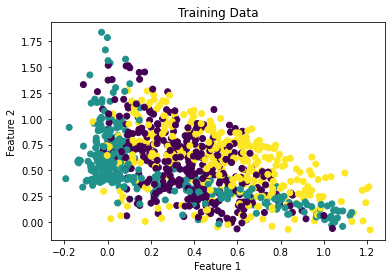

In [6]:
#plotting first column against 2 to see distribution of data 
plt.scatter(train_data_1.iloc[:,1],train_data_1.iloc[:,2] , c= train_data_1.L)
plt.title('Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

## Task 2

1.0


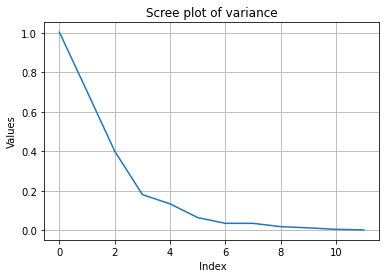

In [7]:
from sklearn.decomposition import PCA
pca= PCA() # not defining number of components bcz not reducing columns n_components can be used to define components nmbr
pca_dt = pca.fit_transform(train_data_1.iloc[:,:12]) #excluding last column as it is a target value
print(pca.explained_variance_ratio_.sum())
ax=sns.lineplot(data=pca.explained_variance_)
ax.set_title('Scree plot of variance')
ax.set_ylabel('Values')
ax.set_xlabel(' Index')
plt.grid()

[Text(0.5, 24.0, ' Feature 1'), Text(485.6727272727271, 0.5, 'Feature 2')]

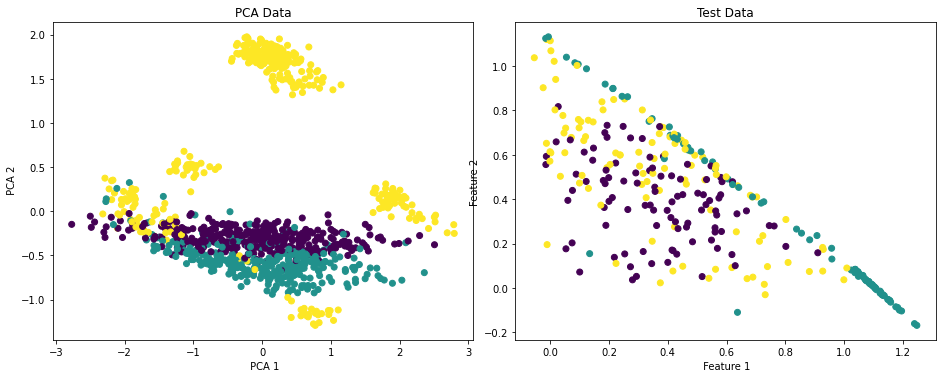

In [8]:
fig, ax = plt.subplots(1,2, figsize=(13,5))
fig.tight_layout()
ax[0].scatter(pca_dt[:,0], pca_dt[:,1], c= train_data_1.L)
ax[0].set_title("PCA Data")
ax[0].set(xlabel=" PCA 1", ylabel=" PCA 2")
ax[1].scatter(test_data.iloc[:,0], test_data.iloc[:,1], c=test_data.L)
ax[1].set_title("Test Data")
ax[1].set(xlabel=" Feature 1", ylabel="Feature 2")


In [9]:
target= train_data_1.L

## Task 3

In [10]:
from sklearn.model_selection import train_test_split

#Spliting training data into two sets of 700 and 300 rows
training_set_2,val_set, training_set_y, val_set_y= train_test_split(train_data.iloc[:,:12], target, test_size=300, random_state=2, shuffle= True)

#Spliting PCA data in same manner to check performance gain later
pca_train_x, pca_val_x, pca_train_y, pca_val_y= train_test_split(pca_dt, target, test_size=300, random_state=2, shuffle= True)

In [11]:
pca_train_x.shape

(700, 12)

## Task 4 

In [12]:
#scaling data
from sklearn import metrics
from sklearn.preprocessing import StandardScaler  #importing StandardScaler module to scale data 
scaler= StandardScaler().fit(training_set_2)
scaled_trn=StandardScaler().fit_transform(training_set_2)
scaled_val= StandardScaler().fit_transform(val_set)

In [13]:
#importing and instantiating Linear Regression model
from sklearn.linear_model import LinearRegression
LR= LinearRegression()

In [14]:
#training model using features from 1 to all and checking error
ls1=[]
for i in range(1,13):
    LR.fit(scaled_trn[:,:i], training_set_y)
    pred= LR.predict(scaled_val[:,:i])
    rmse=np.sqrt(metrics.mean_squared_error(val_set_y, pred))
    print("RMSE when: " ,i," Feature selected: ",rmse)
    ls1.append(rmse)

RMSE when:  1  Feature selected:  0.8416711539851054
RMSE when:  2  Feature selected:  0.8430184721118377
RMSE when:  3  Feature selected:  0.843033465816167
RMSE when:  4  Feature selected:  0.843525298800338
RMSE when:  5  Feature selected:  0.8431734938915691
RMSE when:  6  Feature selected:  0.8419702737189193
RMSE when:  7  Feature selected:  0.8419697138232919
RMSE when:  8  Feature selected:  0.8424211138870609
RMSE when:  9  Feature selected:  0.8451912553303629
RMSE when:  10  Feature selected:  0.8433570251249104
RMSE when:  11  Feature selected:  0.8442353570418742
RMSE when:  12  Feature selected:  0.842042218670052


as it can be seen adding features does not improve result much to be more specific we will go step by step and discuss along 

In [15]:
#traing model with all features
LR.fit(scaled_trn,training_set_y)
pred= LR.predict(scaled_val)
#  mean squared error

print("RMSE",np.sqrt(metrics.mean_squared_error(val_set_y, pred)))

RMSE 0.842042218670052


So from above block we can see if we train our LR model with all the features we get RMSE of 0.842 now we can test with decreasing features to check if this error increases or decreases we will also perform analysis on PCA data as well later

In [16]:
print(LR.intercept_) # to show intercept value of model
print(LR.coef_)      #to show coeficients of corresponding features

1.98
[ 0.09152292  0.058739   -0.11823198  0.08092803  0.17954503  0.15248478
  0.00847429 -0.05745283 -0.06005094 -0.16780536 -0.0443373  -0.08016084]


So we can see from coeficients value some of the feature have negative or very close to 0 value it means they do not contribute
to the result or the are not very significant to understand more we can check collinearity between features but that would go outside the context of this course work so will just check error by removing those features

In [17]:
#first checking error by removing last two features

LR.fit(scaled_trn[:,:10],training_set_y)
pred= LR.predict(scaled_val[:,:10])
#  mean squared error
from sklearn import metrics
print("RMSE",np.sqrt(metrics.mean_squared_error(val_set_y, pred)))

RMSE 0.8433570251249104


It can be clearly seen from above block that removing two features did not impact results significantly. It is clear from coeficients values that all of the features have almost same values hence some values are negative some positive as a result if we keep adding features we will get similar results. 
For further checks corr() function can be used to check colinearity between features and you will find that there is not strong
corelation between features

Now we will check if this is the case with PCA data and how pca improve performance of model
 

In [18]:
ls2=[]
for i in range(1,13):
    LR.fit(pca_train_x[:,:i], pca_train_y)
    pred_pca= LR.predict(pca_val_x[:,:i])
    rmse=np.sqrt(metrics.mean_squared_error(pca_val_y, pred_pca))
    print("RMSE when: " ,i," Feature selected: ",rmse)
    ls2.append(rmse)

RMSE when:  1  Feature selected:  0.8393463146954396
RMSE when:  2  Feature selected:  0.6873854224903632
RMSE when:  3  Feature selected:  0.6888486772243733
RMSE when:  4  Feature selected:  0.6782343185996241
RMSE when:  5  Feature selected:  0.6806325229178367
RMSE when:  6  Feature selected:  0.43637806041528215
RMSE when:  7  Feature selected:  0.429101268238212
RMSE when:  8  Feature selected:  0.42836998921509195
RMSE when:  9  Feature selected:  0.4057117301744894
RMSE when:  10  Feature selected:  0.3549336309707109
RMSE when:  11  Feature selected:  0.3567443274055856
RMSE when:  12  Feature selected:  0.36371780620794


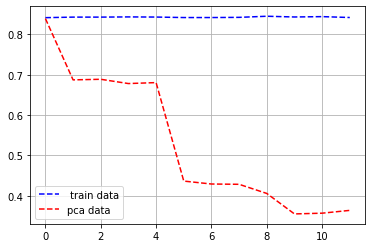

In [19]:
#learning curve of model
plt.plot(ls1, '--', label=' train data', c='b')
plt.plot(ls2,'--', label='pca data', c='r')
plt.legend()
plt.grid()

PCA improve the model significantly and error value is very low as compared to normal standardised data.
from scree plot in task 2 we have seen that first 6 principle components keep 90 percent or variance

Now we can conclude first 6 features are enough for appropriates results 

In [20]:
#scaling test data and training_data_1
scaler2= StandardScaler().fit(train_data_1.iloc[:,:6])
scaled_set_1=StandardScaler().fit_transform(train_data_1.iloc[:,:6]) #selecting only 6 features of training data
scaled_test_set=StandardScaler().fit_transform(test_data.iloc[:,:6])

In [21]:
#testing using selected features on first training set and test set

LR.fit(scaled_set_1, train_data_1.L)
pred_test= LR.predict(scaled_test_set)
print("RMSE",np.sqrt(metrics.mean_squared_error(test_data.L, pred_test)))

RMSE 0.7399268105954165


Our model performed quite good on test data

To summarize
From  task 1 I found the importance of shuffling data and how  PCA realy helps in determining the number of features
and improves perfromance as well and in last task I found that how we can select only required features instead of selecting all
features only import features should be selected to train model
As this was a Classification problem and we were testing with Regression error could have been varied more between 
predicted and actual value if tested on data such as house prices.